##1.การเตรียมข้อมูลสำหรับสร้างตัวแบบ

In [ ]:
import pandas as pd
df = pd.read_csv('golf_df.csv')
df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
df.head() #ดูคุณลักษณะข้อมูล

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [ ]:
df.Play.unique() #ดูค่าที่อยู่ใน column Play

array(['no', 'yes'], dtype=object)

In [ ]:
df.info()
'''
 จะเห็นได้ว่าข้อมุล Dtype เป็น object ไม่สามารถนำไปฝึกด้วยอัลกอริทึมการเรียนรู้ของเครื่องได้
 จำเป็นต้องแปงงเป็นตัวเลขด้วย label encoding ด้วยคำสั่ง LabelEncoder()
'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


'\n จะเห็นได้ว่าข้อมุล Dtype เป็น object ไม่สามารถนำไปฝึกด้วยอัลกอริทึมการเรียนรู้ของเครื่องได้\n จำเป็นต้องแปงงเป็นตัวเลขด้วย label encoding ด้วยคำสั่ง LabelEncoder()\n'

In [ ]:
import pandas as pd
df = pd.read_csv('golf_df.csv')
from sklearn.preprocessing import LabelEncoder
def label_encoder(df, col): #คอลัมน์ที่ทำการแปลงแล้วจะมีตัว c ต่อท้ายเพื่อไว้เปรียบเทียบกับคอลัมน์เดิม
    for i in col:
        le = LabelEncoder().fit_transform(df[i])
        df[i+'c'] = le
columns = ['Outlook','Temperature','Humidity','Windy','Play']
label_encoder(df, columns) #เรียกใช้งานฟังก์ชั่นโดยส่งค่าข้อมูล df,columns เข้าไป
df

,Outlook,Temperature,Humidity,Windy,Play,Outlookc,Temperaturec,Humidityc,Windyc,Playc
0,sunny,hot,high,False,no,2,1,0,0,0
1,sunny,hot,high,True,no,2,1,0,1,0
2,overcast,hot,high,False,yes,0,1,0,0,1
3,rainy,mild,high,False,yes,1,2,0,0,1
4,rainy,cool,normal,False,yes,1,0,1,0,1
5,rainy,cool,normal,True,no,1,0,1,1,0
6,overcast,cool,normal,True,yes,0,0,1,1,1
7,sunny,mild,high,False,no,2,2,0,0,0
8,sunny,cool,normal,False,yes,2,0,1,0,1
9,rainy,mild,normal,False,yes,1,2,1,0,1


###ขั้นตอนการฝึกฝนจะแยกข้อมูลคุณลักษณะ Outlookc,Temperaturec,Humidityc,windyc ไปเก็บไว้ในตัวแปร X และแยกคลาสที่เป็นคำตอบไว้ในตัวแปร y

In [ ]:
X = df.iloc[:,5:-1]
y = df.Playc
print(X)
print('\n',y)

    Outlookc  Temperaturec  Humidityc  Windyc
0          2             1          0       0
1          2             1          0       1
2          0             1          0       0
3          1             2          0       0
4          1             0          1       0
5          1             0          1       1
6          0             0          1       1
7          2             2          0       0
8          2             0          1       0
9          1             2          1       0
10         2             2          1       1
11         0             2          0       1
12         0             1          1       0
13         1             2          0       1

 0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Playc, dtype: int64


##2.การแบ่งชุดข้อมูลและการประเมินตัวแบบ

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print('\n',X_test)
print('\n',y_train)
print('\n',y_test)

    Outlookc  Temperaturec  Humidityc  Windyc
12         0             1          1       0
5          1             0          1       1
8          2             0          1       0
2          0             1          0       0
1          2             1          0       1
13         1             2          0       1
4          1             0          1       0
7          2             2          0       0
10         2             2          1       1
3          1             2          0       0
6          0             0          1       1

     Outlookc  Temperaturec  Humidityc  Windyc
9          1             2          1       0
11         0             2          0       1
0          2             1          0       0

 12    1
5     0
8     1
2     1
1     0
13    0
4     1
7     0
10    1
3     1
6     1
Name: Playc, dtype: int64

 9     1
11    1
0     0
Name: Playc, dtype: int64


###ปัญหา overfitting underfitting และวิธีการแก้ไขด้วยการทำ crossvalidation

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4) #แบ่ง 4 fold
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    '''
    ขั้นตอนการทำงาน:

Import ไลบรารี:

โค้ดเริ่มต้นด้วยการ import ไลบรารี KFold จากโมดูล sklearn.model_selection
สร้างตัวแปร KFold:

kf = KFold(n_splits=4) :
สร้างตัวแปร kf เก็บ object ของคลาส KFold
กำหนดค่าพารามิเตอร์ n_splits เท่ากับ 4 หมายความว่า จะแบ่งข้อมูลออกเป็น 4 folds
วนลูปแบ่งข้อมูล:

for train_index, test_index in kf.split(X): :
วนลูปผ่านชุดข้อมูล X โดยใช้ kf.split()
ฟังก์ชัน split() แบ่งข้อมูลออกเป็น 2 ชุด
ชุดดัชนี train_index แทนข้อมูลสำหรับ training
ชุดดัชนี test_index แทนข้อมูลสำหรับ testing
วงลูปจะวนซ้ำ 4 ครั้ง แสดงผล 4 ชุดข้อมูล (train, test)
'''

TRAIN: [ 4  5  6  7  8  9 10 11 12 13] TEST: [0 1 2 3]
TRAIN: [ 0  1  2  3  8  9 10 11 12 13] TEST: [4 5 6 7]
TRAIN: [ 0  1  2  3  4  5  6  7 11 12 13] TEST: [ 8  9 10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10] TEST: [11 12 13]


##3.การประเมินตัวแบบสำหรับงานด้านการจำแนก

<function matplotlib.pyplot.show(close=None, block=None)>

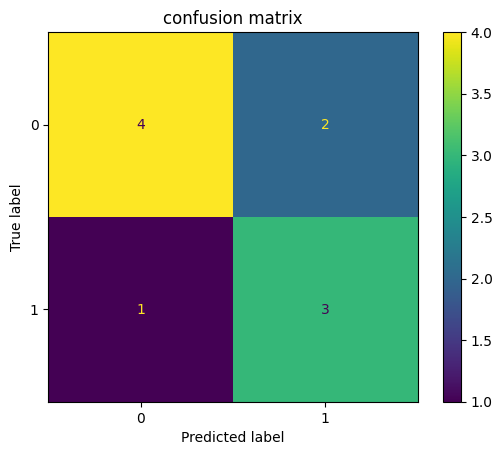

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_true = [0,1,0,1,0,0,1,0,0,1] #กำหนดค่าผลลัพธ์จริง
y_pred = [0,0,0,1,0,1,1,0,1,1] #กำหนดค่าผลลัพธ์จากการทำนาย
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('confusion matrix')
plt.show

In [ ]:
#ค่าความถูกต้อง
from sklearn.metrics import accuracy_score
y_true = [0,1,0,1,0,0,1,0,0,1]
y_pred = [0,0,0,1,0,1,1,0,1,1]
accuracy = accuracy_score(y_true, y_pred) #เรียกใช้ฟังก์ชั่น accuracy มาคำนวณความถูกต้อง
print(f'Accuracy : {accuracy}')

Accuracy : 0.7


In [ ]:
#ค่าความแม่นยำ
from sklearn.metrics import precision_score
y_true = [0,1,0,1,0,0,1,0,0,1]
y_pred = [0,0,0,1,0,1,1,0,1,1]
precision = precision_score(y_true, y_pred)
print(f'Precision : {precision}')

Precision : 0.6


In [ ]:
#ค่าความระลึก
from sklearn.metrics import recall_score
y_true = [0,1,0,1,0,0,1,0,0,1]
y_pred = [0,0,0,1,0,1,1,0,1,1]
recall = recall_score(y_true, y_pred)
print(f'Recall : {recall}')

Recall : 0.75


In [ ]:
#ค่าคะแนนเอฟ 1
from sklearn.metrics import f1_score
y_true = [0,1,0,1,0,0,1,0,0,1]
y_pred = [0,0,0,1,0,1,1,0,1,1]
f1 = f1_score(y_true, y_pred)
print(f'F1 : {f1}')

F1 : 0.6666666666666665


In [ ]:
#ค่าเส้นโค้งลักษณะเฉพาะดำเนินการตัวรับและค่าพื้นที่ใต้กราฟ(ROC-AUC)
from sklearn.metrics import roc_auc_score
y_true = [0,1,0,1,0,0,1,0,0,1]
y_pred = [0,0,0,1,0,1,1,0,1,1]
roc_auc = roc_auc_score(y_true, y_pred)
print(f'ROC-AUC : {roc_auc}')

ROC-AUC : 0.7083333333333334


#การประเมินตัวแบบสำหรับงานด้านการวิเคราะห์การถดถอย

In [ ]:
#1.ค่าคลาดเคลื่อนสัมบูรณ์เฉลี่ย Mean Absolute Error: MAE
from sklearn.metrics import mean_absolute_error
y_true = [10,8,12,16,20]
y_pred = [7.6,10.4,13.2,16,18.8]
MAE = mean_absolute_error(y_true, y_pred)
print(f'MAE : {MAE}')

MAE : 1.44


In [ ]:
# 2. ร้อยละค่าความคลาดเคลื่อนสัมบูรณ์เฉลี่ย
from sklearn.metrics import mean_absolute_percentage_error
y_true = [10,8,12,16,20]
y_pred = [7.6,10.4,13.2,16,18.8]
MAPE = mean_absolute_percentage_error(y_true, y_pred)
print(f'MAPE : {MAPE*100}')

MAPE : 13.999999999999998


In [ ]:
# 3. ค่าคลาดเคลือนกำลังสองเฉลี่ย
from sklearn.metrics import mean_squared_error
y_true = [10,8,12,16,20]
y_pred = [7.6,10.4,13.2,16,18.8]
MSE = mean_squared_error(y_true, y_pred)
print(f'MSE : {MSE}')

MSE : 2.88


In [ ]:
# 4. รากที่สองของค่าคลาดเคลื่อนเฉลี่ยกำลังสอง Root Mean Squared Error: RMSE
from sklearn.metrics import mean_squared_log_error
y_true = [10,8,12,16,20]
y_pred = [7.6,10.4,13.2,16,18.8]
RMSE = mean_squared_error(y_true,y_pred,squared=False)
print(f'RMSE : {RMSE}')

RMSE : 1.697056274847714


In [ ]:
# 5. ค่าสัมประสิทธิ์กำหนด R squared coefficient : R2
from sklearn.metrics import r2_score
y_true = [10,8,12,16,20]
y_pred = [7.6,10.4,13.2,16,18.8]
R2 = r2_score(y_true, y_pred)
print(f'R2 : {R2}')

R2 : 0.8448275862068966
